### The contents of data are as follows
hotel                                 
is_canceled                            
lead_time                              
arrival_date_year                      
arrival_date_month                     
arrival_date_week_number               
arrival_date_day_of_month              
stays_in_weekend_nights                
stays_in_week_nights                   
adults                                 
children                               
babies                                 
meal                                   
country                              
market_segment                         
distribution_channel                   
is_repeated_guest                      
previous_cancellations                 
previous_bookings_not_canceled         
reserved_room_type                     
assigned_room_type                     
booking_changes                        
deposit_type                           
agent                              
company                           
days_in_waiting_list                   
customer_type                          
adr (Average daily rate)                                 
required_car_parking_spaces            
total_of_special_requests              
reservation_status                     
reservation_status_date 

 # 1.. lets read data.. 
 Let's understand what's in the data.

In [1]:
#Import the required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [11]:
df=pd.read_csv('hotel_bookings.csv')

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,7/3/2015
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,7/3/2015
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,5/6/2015
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,4/22/2015


# 2.. lets perform data cleaning..

In [5]:
#Find the number of columns and rows of data.
df.shape

(119390, 32)

In [6]:
# Find a null values contained in each column.
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [14]:
df.drop(['agent','company'],axis=1,inplace=True)

In [15]:
# Find a null values contained in each column.
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

### Find out which countries were the most common in the customer's data

In [16]:
df['country'].value_counts()#.index[0]

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

### Replace the country with the null value for the most common country.

In [17]:
df['country'].fillna(df['country'].value_counts().index[0],inplace=True)

### Apparently, most of the guests do not have children.

In [18]:
df['children'].head(20)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    1.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
Name: children, dtype: float64

In [19]:
df.fillna(0,inplace=True)

In [20]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [21]:
### seems to have some dirtiness in data as Adults,babies & children cant be zero at a same time ..

### bcz if 3 entities are 0 ,then how can a booking be possible ??

In [22]:
### Visualise Entire Dataframe where adult,children & babies are 0

filter1=(df['children']==0) & (df['adults']==0) & (df['babies']==0)

In [26]:
df[filter1].shape

(180, 30)

In [27]:
df[filter1]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,I,1,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,I,0,No Deposit,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,C,0,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,A,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,C,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,A,1,No Deposit,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,K,0,No Deposit,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,K,2,No Deposit,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,K,1,No Deposit,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [28]:
data=df[~filter1]

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   stays_in_weekend_nights         119210 non-null  int64  
 8   stays_in_week_nights            119210 non-null  int64  
 9   adults                          119210 non-null  int64  
 10  children                        119210 non-null  float64
 11  babies                          119210 non-null  int64  
 12  meal            

In [31]:
data.shape

(119210, 30)

In [32]:
df.shape

(119390, 30)

In [33]:
df[df['children']==0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,9/7/2017


# 3.. Where do the guests come from ?

In [34]:
## Lets perform Spatial Analysis

In [35]:
#Apparently, 1 means canceled.
data['is_canceled'].unique()

array([0, 1])

In [36]:
data['is_canceled'].value_counts()

0    75011
1    44199
Name: is_canceled, dtype: int64

In [37]:
#Percentage of guests by country
(data[data['is_canceled']==0]['country'].value_counts()/75011).head(20)

PRT    0.285265
GBR    0.128888
FRA    0.112890
ESP    0.085094
DEU    0.080881
IRL    0.033888
ITA    0.032369
BEL    0.024903
NLD    0.022877
USA    0.021224
BRA    0.018557
CHE    0.017304
AUT    0.013771
CN     0.013665
SWE    0.010572
POL    0.009372
CHN    0.007159
ISR    0.006666
NOR    0.005679
RUS    0.005213
Name: country, dtype: float64

In [38]:
len(data[data['is_canceled']==0])

75011

In [40]:
country_wise_data=data[data['is_canceled']==0]['country'].value_counts().reset_index()
country_wise_data.columns=['country','no_of_guests']
country_wise_data

,country,no_of_guests
0,PRT,21398
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


In [41]:
##!pip install plotly

In [42]:
##!pip install chart_studio

In [43]:
import plotly
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs ,init_notebook_mode ,plot ,iplot
init_notebook_mode(connected=True)

In [44]:
import plotly.express as px

In [45]:
map_guest=px.choropleth(country_wise_data,
             locations=country_wise_data['country'],
             color=country_wise_data['no_of_guests'],
              hover_name=country_wise_data['country'],
              title='home country of guests'
             )

In [46]:
map_guest.show()

# 4.. How much do guests pay for a room per night ?

In [47]:
data2=data[data['is_canceled']==0]

In [48]:
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

*adr: the measure of the average paid for rooms sold in a given time period.

Text(0, 0.5, 'price( EUR)')

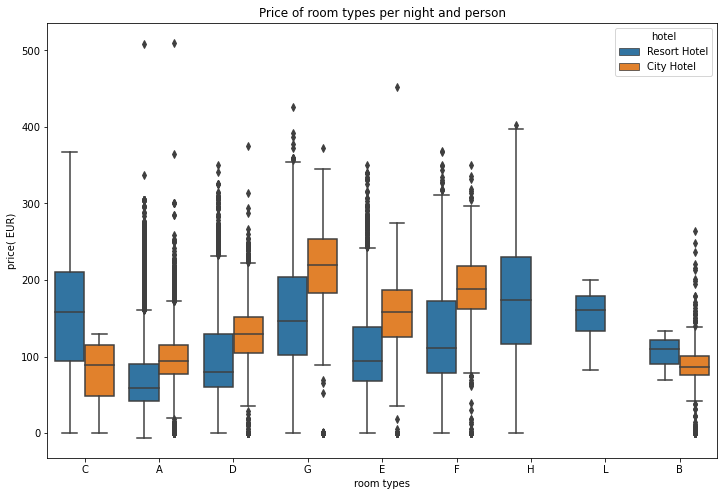

In [50]:
# seaborn boxplot:

plt.figure(figsize=(12,8))
sns.boxplot(x='reserved_room_type',y='adr' ,hue='hotel',data=data2)

plt.title('Price of room types per night and person')
plt.xlabel('room types')
plt.ylabel('price( EUR)')

# 5.. Which are the most busy month ?

In [51]:
data['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [52]:
data_resort=data[(data['hotel']=='Resort Hotel') & (data['is_canceled']==0)]
data_city = data[(data['hotel']=='City Hotel') & (data['is_canceled']==0)]

In [54]:
data_resort.shape

(28927, 30)

In [55]:
data_city.shape

(46084, 30)

In [56]:
rush_resort=data_resort['arrival_date_month'].value_counts().reset_index()
rush_resort.columns=['month','no_of_guests']
rush_resort

,month,no_of_guests
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [57]:
rush_city=data_city['arrival_date_month'].value_counts().reset_index()
rush_city.columns=['month','no_of_guests']
rush_city

,month,no_of_guests
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


In [58]:
final_rush=rush_resort.merge(rush_city,on='month')

In [60]:
final_rush.columns=['month','no_of_guests_in_resort','no_of_guests_city']

In [61]:
final_rush

,month,no_of_guests_in_resort,no_of_guests_city
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [62]:
!pip install sorted-months-weekdays

## Dependency package needs to be installed
!pip install sort_dataframeby_monthorweek

In [63]:
import sort_dataframeby_monthorweek as sd

In [64]:
final_rush=sd.Sort_Dataframeby_Month(final_rush,'month')

In [65]:
final_rush.columns

Index(['month', 'no_of_guests_in_resort', 'no_of_guests_city'], dtype='object')

In [66]:
px.line(data_frame=final_rush,x='month',y=['no_of_guests_in_resort', 'no_of_guests_city'])

# 6.. which month has highest adr ?

In [52]:
data=sd.Sort_Dataframeby_Month(data,'arrival_date_month')

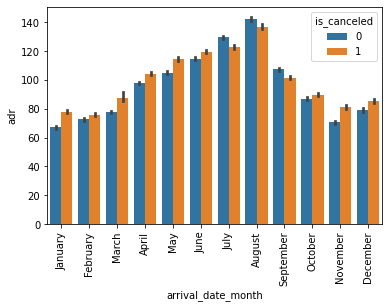

In [53]:
sns.barplot(x='arrival_date_month',y='adr',data=data ,hue='is_canceled')
plt.xticks(rotation='vertical')
plt.show()

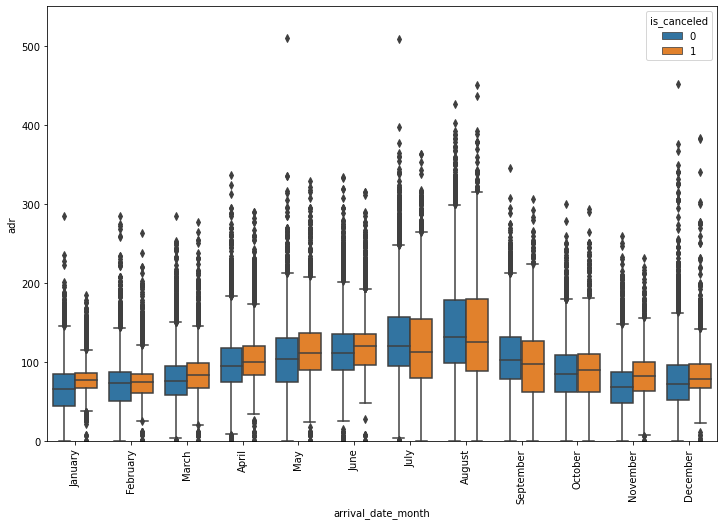

In [54]:
plt.figure(figsize=(12,8))
sns.boxplot(x='arrival_date_month',y='adr',data=data ,hue='is_canceled')
plt.xticks(rotation='vertical')


plt.ylim(0,550)
plt.show()

# 7.. Lets analyse whether bookings were made only for weekdays or for weekends or for both ??

In [67]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [68]:
### Lets create a relationship table..
pd.crosstab(index=data['stays_in_weekend_nights'],columns=data['stays_in_week_nights'])

stays_in_week_nights,0,1,2,3,4,5,6,7,8,9,...,24,25,26,30,32,33,34,40,42,50
stays_in_weekend_nights,,,,,,,,,,,,,,,,,,,,,
0,645,16436,17949,11557,4478,830,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4569,7325,8976,6150,2407,1188,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2358,6531,6745,4534,2658,8648,847,446,391,81,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,308,300,397,131,61,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,94,347,181,132,86,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Each customer is categorized as staying only on weekdays, only on weekends, or both on weekdays and weekends.

In [69]:
## lets define our own function :

def week_function(row):
    feature1='stays_in_weekend_nights'
    feature2='stays_in_week_nights'
    
    if row[feature2]==0 and row[feature1] >0 :
        return 'stay_just_weekend'
    
    elif row[feature2]>0 and row[feature1] ==0 :
        return 'stay_just_weekdays'
    
    elif row[feature2]>0 and row[feature1] >0 :
        return 'stay_both_weekdays_weekends'
    
    else:
        return 'undefined_data'

In [70]:
data2['weekend_or_weekday']=data2.apply(week_function,axis=1)

<ipython-input-70-90193ed9f00d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [71]:
data2.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,weekend_or_weekday
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015,undefined_data
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015,undefined_data
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015,stay_just_weekdays
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015,stay_just_weekdays
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,7/3/2015,stay_just_weekdays
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,7/3/2015,stay_just_weekdays
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,107.0,0,0,Check-Out,7/3/2015,stay_just_weekdays
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,103.0,0,1,Check-Out,7/3/2015,stay_just_weekdays
11,Resort Hotel,0,35,2015,July,27,1,0,4,2,...,0,No Deposit,0,Transient,145.0,0,0,Check-Out,7/5/2015,stay_just_weekdays
12,Resort Hotel,0,68,2015,July,27,1,0,4,2,...,0,No Deposit,0,Transient,97.0,0,3,Check-Out,7/5/2015,stay_just_weekdays


In [72]:
data2['weekend_or_weekday'].value_counts()

stay_both_weekdays_weekends    37551
stay_just_weekdays             31788
stay_just_weekend               5050
undefined_data                   622
Name: weekend_or_weekday, dtype: int64

In [73]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75011 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           75011 non-null  object 
 1   is_canceled                     75011 non-null  int64  
 2   lead_time                       75011 non-null  int64  
 3   arrival_date_year               75011 non-null  int64  
 4   arrival_date_month              75011 non-null  object 
 5   arrival_date_week_number        75011 non-null  int64  
 6   arrival_date_day_of_month       75011 non-null  int64  
 7   stays_in_weekend_nights         75011 non-null  int64  
 8   stays_in_week_nights            75011 non-null  int64  
 9   adults                          75011 non-null  int64  
 10  children                        75011 non-null  float64
 11  babies                          75011 non-null  int64  
 12  meal                           

In [74]:
type(sd)

module

In [75]:
data2=sd.Sort_Dataframeby_Month(data2,'arrival_date_month')

In [80]:
data2.groupby(['arrival_date_month','weekend_or_weekday']).size()

arrival_date_month  weekend_or_weekday         
April               stay_both_weekdays_weekends    3627
                    stay_just_weekdays             2559
                    stay_just_weekend               344
                    undefined_data                   30
August              stay_both_weekdays_weekends    4929
                    stay_just_weekdays             3137
                    stay_just_weekend               509
                    undefined_data                   49
December            stay_both_weekdays_weekends    1901
                    stay_just_weekdays             2123
                    stay_just_weekend               298
                    undefined_data                   69
February            stay_both_weekdays_weekends    2438
                    stay_just_weekdays             2514
                    stay_just_weekend               360
                    undefined_data                   47
January             stay_both_weekdays_weekends    1550


In [87]:
group_data=data2.groupby(['arrival_date_month','weekend_or_weekday']).size().unstack().reset_index()

In [88]:
print(group_data)

weekend_or_weekday arrival_date_month  stay_both_weekdays_weekends  \
0                               April                         3627   
1                              August                         4929   
2                            December                         1901   
3                            February                         2438   
4                             January                         1550   
5                                July                         4570   
6                                June                         3241   
7                               March                         3151   
8                                 May                         3442   
9                            November                         2117   
10                            October                         3393   
11                          September                         3192   

weekend_or_weekday  stay_just_weekdays  stay_just_weekend  undefined_data  
0            

In [89]:
sorted_data=sd.Sort_Dataframeby_Month(group_data,'arrival_date_month')

In [90]:
print(sorted_data)

   arrival_date_month  stay_both_weekdays_weekends  stay_just_weekdays  \
0             January                         1550                2125   
1            February                         2438                2514   
2               March                         3151                3060   
3               April                         3627                2559   
4                 May                         3442                3017   
5                June                         3241                2685   
6                July                         4570                2818   
7              August                         4929                3137   
8           September                         3192                2692   
9             October                         3393                2844   
10           November                         2117                2214   
11           December                         1901                2123   

    stay_just_weekend  undefined_data

In [91]:
sorted_data.set_index('arrival_date_month',inplace=True)

In [92]:
sorted_data

,stay_both_weekdays_weekends,stay_just_weekdays,stay_just_weekend,undefined_data
arrival_date_month,,,,
January,1550,2125,393,47
February,2438,2514,360,47
March,3151,3060,359,50
April,3627,2559,344,30
May,3442,3017,570,74
June,3241,2685,433,36
July,4570,2818,462,57
August,4929,3137,509,49
September,3192,2692,479,22


<AxesSubplot:xlabel='arrival_date_month'>

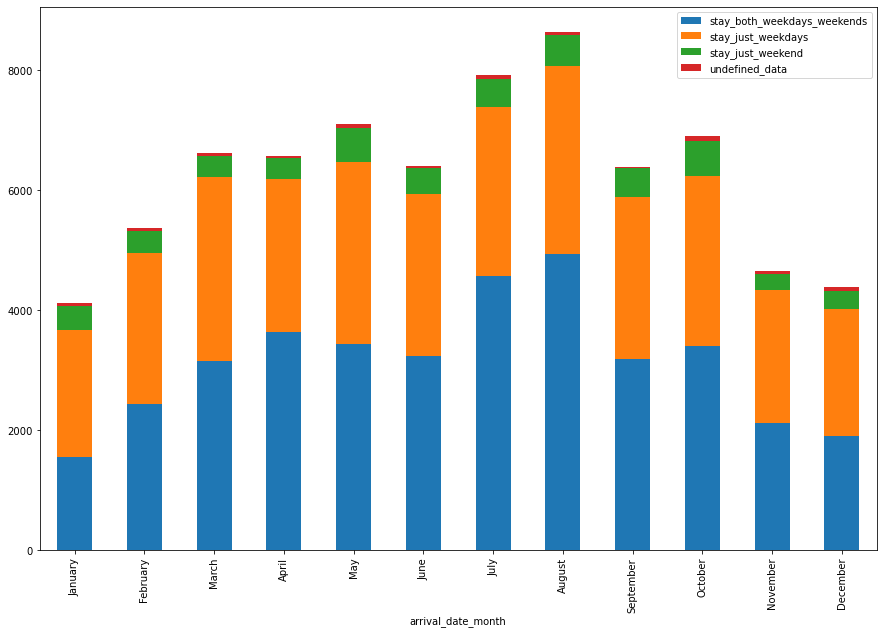

In [93]:
sorted_data.plot(kind='bar',stacked=True,figsize=(15,10))

# 8.. How to create some more features ..

In [94]:
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'weekend_or_weekday'],
      dtype='object')

In [95]:
#Classify whether or not they are with children.
def family(row):
    if (row['adults']>0) &  (row['children']>0 or row['babies']>0) :
        return 1
    else:
        return 0

In [96]:
data['is_family']=data.apply(family,axis=1)

<ipython-input-96-58ec663b5778>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [97]:
data['total_customer'] = data['adults'] + data['babies'] + data['children']

<ipython-input-97-a1293d6c0b93>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [98]:
data['total_nights']=data['stays_in_week_nights'] + data['stays_in_weekend_nights']

<ipython-input-98-0889395faf3c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [99]:
data.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_family,total_customer,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,7/1/2015,0,2.0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,7/1/2015,0,2.0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,7/2/2015,0,1.0,1


In [100]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'is_family',
       'total_customer', 'total_nights'],
      dtype='object')

In [101]:
data['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [102]:
data['deposit_type'].value_counts()

No Deposit    104461
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

In [103]:
dict1={'No Deposit':0, 'Non Refund':1, 'Refundable': 0}

In [104]:
data['deposit_given']=data['deposit_type'].map(dict1)

<ipython-input-104-79a19d847398>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [105]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_family,total_customer,total_nights,deposit_given
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,7/1/2015,0,2.0,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,7/1/2015,0,2.0,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,7/2/2015,0,1.0,1,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,7/2/2015,0,1.0,1,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,7/3/2015,0,2.0,2,0


In [106]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'is_family',
       'total_customer', 'total_nights', 'deposit_given'],
      dtype='object')

In [107]:
data.drop(columns=['adults', 'children', 'babies', 'deposit_type'],axis=1,inplace=True)

<ipython-input-107-bcca04c093f9>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [108]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'is_family', 'total_customer',
       'total_nights', 'deposit_given'],
      dtype='object')

# 9.. how to apply Feature encoding on data 

In [109]:
data.head(6)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_family,total_customer,total_nights,deposit_given
0,Resort Hotel,0,342,2015,July,27,1,0,0,BB,...,Transient,0.0,0,0,Check-Out,7/1/2015,0,2.0,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,BB,...,Transient,0.0,0,0,Check-Out,7/1/2015,0,2.0,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,BB,...,Transient,75.0,0,0,Check-Out,7/2/2015,0,1.0,1,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,BB,...,Transient,75.0,0,0,Check-Out,7/2/2015,0,1.0,1,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,BB,...,Transient,98.0,0,1,Check-Out,7/3/2015,0,2.0,2,0
5,Resort Hotel,0,14,2015,July,27,1,0,2,BB,...,Transient,98.0,0,1,Check-Out,7/3/2015,0,2.0,2,0


In [110]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
days_in_waiting_list                int64
customer_type                      object
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests         

In [111]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'is_family', 'total_customer',
       'total_nights', 'deposit_given'],
      dtype='object')

In [ ]:
#Data Type Classification

In [112]:
cate_features=[col for col in data.columns if data[col].dtype=='object']

In [113]:
num_features=[col for col in data.columns if data[col].dtype!='object']

In [114]:
num_features

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'is_family',
 'total_customer',
 'total_nights',
 'deposit_given']

In [115]:
cate_features

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [116]:
data_cat=data[cate_features]

In [117]:
data_cat.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,Transient,Check-Out,7/1/2015
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,Transient,Check-Out,7/1/2015
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,Transient,Check-Out,7/2/2015
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,Transient,Check-Out,7/2/2015
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,Transient,Check-Out,7/3/2015


In [119]:
data.groupby(['hotel'])['is_canceled'].mean().to_dict()

{'City Hotel': 0.4178593534858457, 'Resort Hotel': 0.27767373336329815}

In [120]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [121]:
data_cat['cancellation']=data['is_canceled']

In [126]:
data_cat.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,cancellation
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,Transient,Check-Out,7/1/2015,0
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,Transient,Check-Out,7/1/2015,0
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,Transient,Check-Out,7/2/2015,0
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,Transient,Check-Out,7/2/2015,0
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,Transient,Check-Out,7/3/2015,0


In [127]:
cols=data_cat.columns

In [128]:
cols

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date',
       'cancellation'],
      dtype='object')

In [129]:
cols=cols[0:-1]

In [130]:
cols

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date'],
      dtype='object')

In [131]:
### Perform Mean Encoding Technique 

for col in cols:
    dict2=data_cat.groupby([col])['cancellation'].mean().to_dict()
    data_cat[col]=data_cat[col].map(dict2)

In [132]:
data_cat.shape

(119210, 12)

In [133]:
data_cat.head(5)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,cancellation
0,0.277674,0.374644,0.374106,0.562958,0.153712,0.174868,0.330827,0.188186,0.407864,0.0,0.800000,0
1,0.277674,0.374644,0.374106,0.562958,0.153712,0.174868,0.330827,0.188186,0.407864,0.0,0.800000,0
2,0.277674,0.374644,0.374106,0.202310,0.153712,0.174868,0.391567,0.188186,0.407864,0.0,0.985075,0
3,0.277674,0.374644,0.374106,0.202310,0.187618,0.220568,0.391567,0.445055,0.407864,0.0,0.985075,0
4,0.277674,0.374644,0.374106,0.202310,0.367590,0.410598,0.391567,0.445055,0.407864,0.0,0.522876,0


# 10.. Handle Outliers 

In [134]:
data[num_features]

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
0,0,342,2015,27,1,0,0,0,0,0,3,0,0.00,0,0,0,2.0,0,0
1,0,737,2015,27,1,0,0,0,0,0,4,0,0.00,0,0,0,2.0,0,0
2,0,7,2015,27,1,0,1,0,0,0,0,0,75.00,0,0,0,1.0,1,0
3,0,13,2015,27,1,0,1,0,0,0,0,0,75.00,0,0,0,1.0,1,0
4,0,14,2015,27,1,0,2,0,0,0,0,0,98.00,0,1,0,2.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,35,30,2,5,0,0,0,0,0,96.14,0,0,0,2.0,7,0
119386,0,102,2017,35,31,2,5,0,0,0,0,0,225.43,0,2,0,3.0,7,0
119387,0,34,2017,35,31,2,5,0,0,0,0,0,157.71,0,4,0,2.0,7,0
119388,0,109,2017,35,31,2,5,0,0,0,0,0,104.40,0,0,0,2.0,7,0


In [135]:
dataframe=pd.concat([data_cat,data[num_features]],axis=1)

In [136]:
dataframe.columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date',
       'cancellation', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'is_family',
       'total_customer', 'total_nights', 'deposit_given'],
      dtype='object')

In [137]:
dataframe.drop(['cancellation'],axis=1,inplace=True)

In [138]:
dataframe.head(3)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
0,0.277674,0.374644,0.374106,0.562958,0.153712,0.174868,0.330827,0.188186,0.407864,0.0,...,0,3,0,0.0,0,0,0,2.0,0,0
1,0.277674,0.374644,0.374106,0.562958,0.153712,0.174868,0.330827,0.188186,0.407864,0.0,...,0,4,0,0.0,0,0,0,2.0,0,0
2,0.277674,0.374644,0.374106,0.202310,0.153712,0.174868,0.391567,0.188186,0.407864,0.0,...,0,0,0,75.0,0,0,0,1.0,1,0


Booking or Reservation Lead Time is the period of time (most typically measured in calendar days) between when a guest makes the reservation and the actual check-in/arrival date. 

<AxesSubplot:xlabel='lead_time', ylabel='Density'>

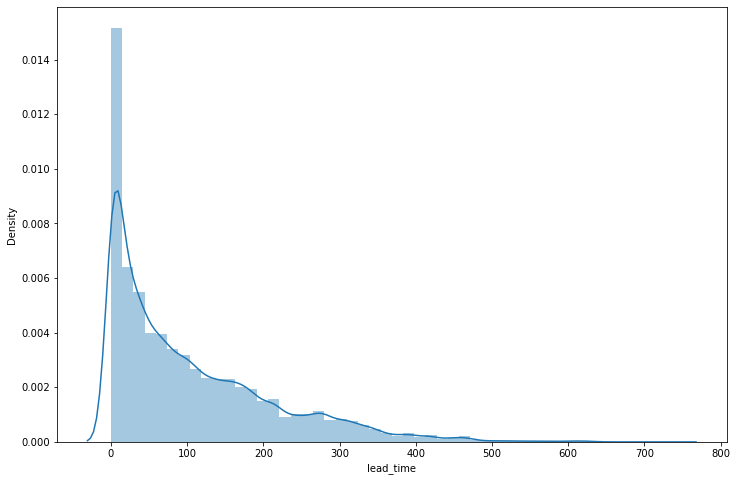

In [140]:
plt.figure(figsize=(12,8))
sns.distplot(dataframe['lead_time'])

In [141]:
def handle_outlier(col):
    dataframe[col]=np.log1p(dataframe[col])

In [142]:
handle_outlier('lead_time')

<AxesSubplot:xlabel='lead_time', ylabel='Density'>

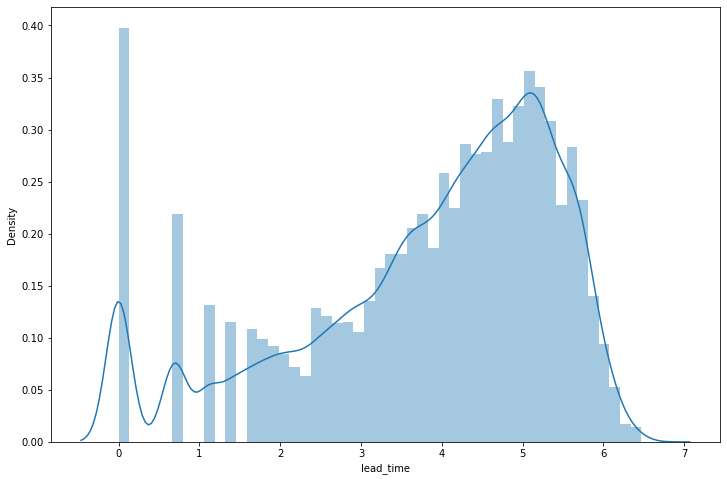

In [143]:
plt.figure(figsize=(12,8))
sns.distplot(dataframe['lead_time'])

In [145]:
## adr

<AxesSubplot:xlabel='adr', ylabel='Density'>

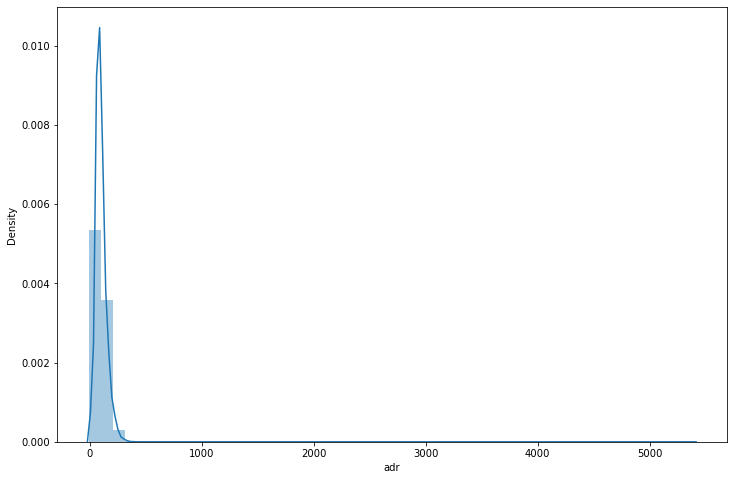

In [146]:
plt.figure(figsize=(12,8))
sns.distplot(dataframe['adr'])

In [147]:
dataframe[dataframe['adr']<0]

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
14969,0.277674,0.322277,0.374106,0.20231,0.611086,0.174868,0.391567,0.352528,0.254504,0.0,...,2,2,0,-6.38,0,0,0,2.0,10,0


In [148]:
handle_outlier('adr')

In [149]:
dataframe['adr'].isnull().sum()

1

In [150]:
### now why this missing value , as we have already deal with the missing values..'
### bcz we have negative value in 'adr' feature as '-6.38'  ,& if we apply ln(1+x) , we will get 'nan'
## bcz log wont take negative values..

<AxesSubplot:xlabel='adr', ylabel='Density'>

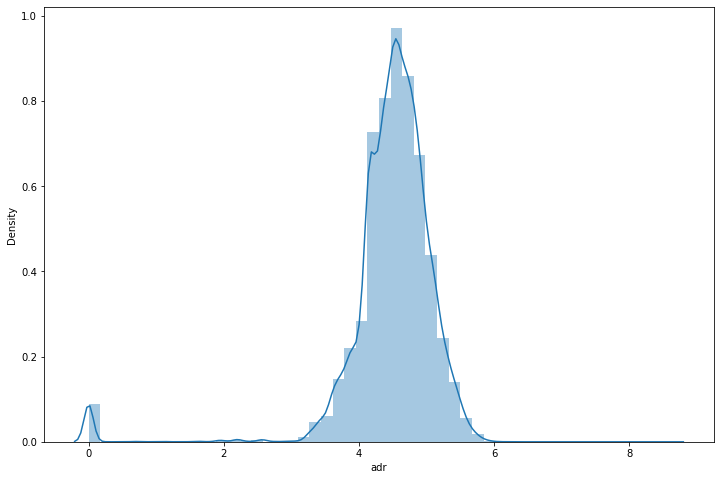

In [151]:
plt.figure(figsize=(12,8))
sns.distplot(dataframe['adr'].dropna())

# 11.. Select important Features using Co-relation & univariate analysis..

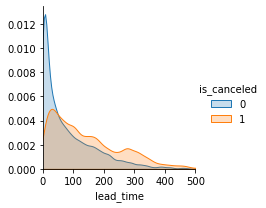

In [153]:
sns.FacetGrid(data,hue='is_canceled',xlim=(0,500)).map(sns.kdeplot,'lead_time',shade=True).add_legend()

In [155]:
corr=dataframe.corr()

<AxesSubplot:>

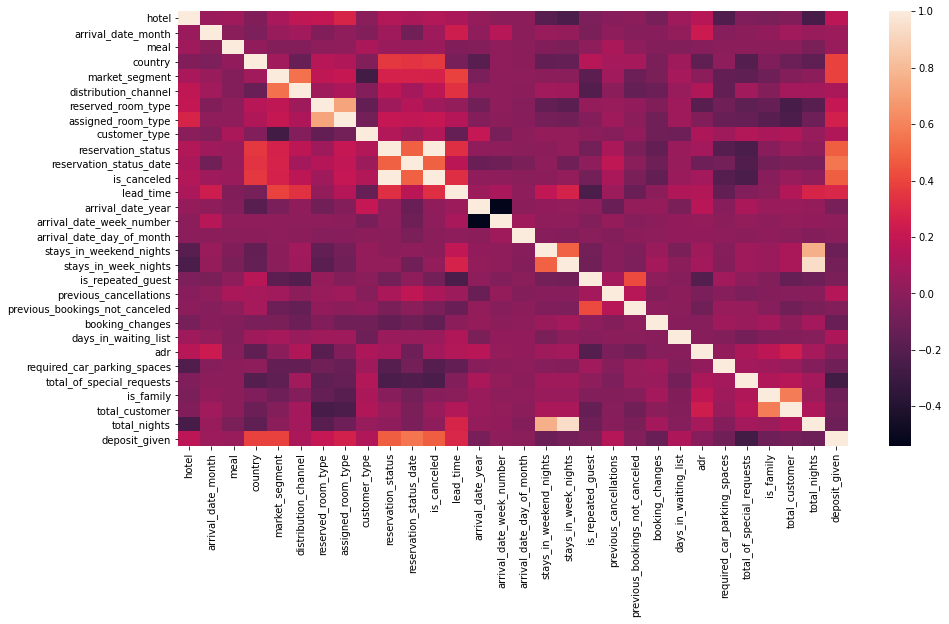

In [158]:
plt.figure(figsize = (15,8))
sns.heatmap(corr)

In [159]:
corr['is_canceled'].sort_values(ascending=False)

reservation_status                1.000000
is_canceled                       1.000000
reservation_status_date           0.488307
deposit_given                     0.481507
country                           0.357232
lead_time                         0.320075
market_segment                    0.267006
assigned_room_type                0.201570
distribution_channel              0.177167
hotel                             0.137082
customer_type                     0.136617
previous_cancellations            0.110139
adr                               0.081660
reserved_room_type                0.072769
arrival_date_month                0.069886
days_in_waiting_list              0.054301
meal                              0.050584
total_customer                    0.044826
stays_in_week_nights              0.025542
total_nights                      0.018554
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
stays_in_weekend_nights          -0.001323
arrival_dat

In [160]:
corr['is_canceled'].sort_values(ascending=False).index

Index(['reservation_status', 'is_canceled', 'reservation_status_date',
       'deposit_given', 'country', 'lead_time', 'market_segment',
       'assigned_room_type', 'distribution_channel', 'hotel', 'customer_type',
       'previous_cancellations', 'adr', 'reserved_room_type',
       'arrival_date_month', 'days_in_waiting_list', 'meal', 'total_customer',
       'stays_in_week_nights', 'total_nights', 'arrival_date_year',
       'arrival_date_week_number', 'stays_in_weekend_nights',
       'arrival_date_day_of_month', 'is_family',
       'previous_bookings_not_canceled', 'is_repeated_guest',
       'booking_changes', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [161]:
features_to_drop=['reservation_status', 'reservation_status_date','arrival_date_year',
       'arrival_date_week_number', 'stays_in_weekend_nights',
       'arrival_date_day_of_month']

In [162]:
dataframe.drop(features_to_drop,axis=1,inplace=True)

In [163]:
dataframe.shape

(119210, 24)

# 12.. How to find Important features for model building..

In [164]:
dataframe.head(2)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,is_canceled,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
0,0.277674,0.374644,0.374106,0.562958,0.153712,0.174868,0.330827,0.188186,0.407864,0,...,0,3,0,0.0,0,0,0,2.0,0,0
1,0.277674,0.374644,0.374106,0.562958,0.153712,0.174868,0.330827,0.188186,0.407864,0,...,0,4,0,0.0,0,0,0,2.0,0,0


In [165]:
dataframe.isnull().sum()

hotel                             0
arrival_date_month                0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
reserved_room_type                0
assigned_room_type                0
customer_type                     0
is_canceled                       0
lead_time                         0
stays_in_week_nights              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               1
required_car_parking_spaces       0
total_of_special_requests         0
is_family                         0
total_customer                    0
total_nights                      0
deposit_given                     0
dtype: int64

In [166]:
dataframe.dropna(inplace=True)

In [167]:
## separate dependent & independent features

In [168]:
x=dataframe.drop('is_canceled',axis=1)

In [169]:
y=dataframe['is_canceled']

In [170]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [171]:
##Lasso(alpha=0.005)
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.


In [172]:
feature_sel_model=SelectFromModel(Lasso(alpha=0.005))

In [173]:
feature_sel_model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005))

In [174]:
feature_sel_model.get_support()

array([False, False, False,  True, False, False, False, False, False,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True])

In [175]:
cols=x.columns

In [176]:
cols

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'lead_time', 'stays_in_week_nights',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'is_family', 'total_customer',
       'total_nights', 'deposit_given'],
      dtype='object')

In [177]:
# let's print the number of selected features

selected_feature=cols[feature_sel_model.get_support()]

In [178]:
selected_feature

Index(['country', 'lead_time', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_customer', 'total_nights',
       'deposit_given'],
      dtype='object')

In [179]:
x=x[selected_feature]

In [180]:
y

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 119209, dtype: int64

# 13.. Lets build ML model..

In [181]:
from sklearn.model_selection import train_test_split

In [182]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.25)

In [183]:
X_train.shape

(89406, 12)

In [184]:
from sklearn.linear_model import LogisticRegression


In [185]:
logreg=LogisticRegression(solver='liblinear')

In [186]:
logreg.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [187]:
pred=logreg.predict(X_test)

In [188]:
pred

array([1, 1, 0, ..., 1, 1, 1])

In [189]:
from sklearn.metrics import confusion_matrix

In [190]:
confusion_matrix(y_test,pred)

array([[17126,  1476],
       [ 4732,  6469]])

In [191]:
from sklearn.metrics import accuracy_score

In [192]:
accuracy_score(y_test,pred)

0.7916988222662148

# 14.. How to cross-validate model..

In [193]:
from sklearn.model_selection import cross_val_score

In [194]:
score=cross_val_score(logreg,x,y,cv=10)

In [195]:
score

array([0.78609177, 0.75136314, 0.84380505, 0.74247127, 0.72703632,
       0.79070548, 0.73433437, 0.80655985, 0.79632581, 0.89697987])

In [196]:
score.mean()

0.7875672928434341

# 15.. playing with multiple algos..

In [181]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier



In [185]:
models=[]

models.append(('LogisticRegression',LogisticRegression(solver='liblinear')))
models.append(('Naive_bayes',GaussianNB()))
models.append(('Random Forest',RandomForestClassifier()))
models.append(('Decision_tree',DecisionTreeClassifier()))
models.append(('KNN',KNeighborsClassifier()))

In [186]:
for name,model in models:
    print(name)
    model.fit(X_train,y_train)
    
    predictions=model.predict(X_test)
    
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(predictions,y_test)
    print(cm)
    
    from sklearn.metrics import accuracy_score
    acc=accuracy_score(predictions,y_test)
    print(acc)
    print('\n')

LogisticRegression
[[17350  4511]
 [ 1486  6456]]
0.7987786464449887


Naive_bayes
[[ 6372   599]
 [12464 10368]]
0.5616884206287958


Random Forest
[[17284  2716]
 [ 1552  8251]]
0.8567929403080227


Decision_tree
[[16052  2611]
 [ 2784  8356]]
0.8189779552394054


KNN
[[16784  3365]
 [ 2052  7602]]
0.8182397745193437




# Fin.